In [35]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [36]:
df=pd.read_csv('D:/Om Data Science/50_Startups.csv')

In [37]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [40]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [42]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [43]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [45]:
data=df.rename({'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MKS'}, axis=1)
data

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Correlation Matrix

In [48]:
data.corr()

,RDS,ADM,MKS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MKS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

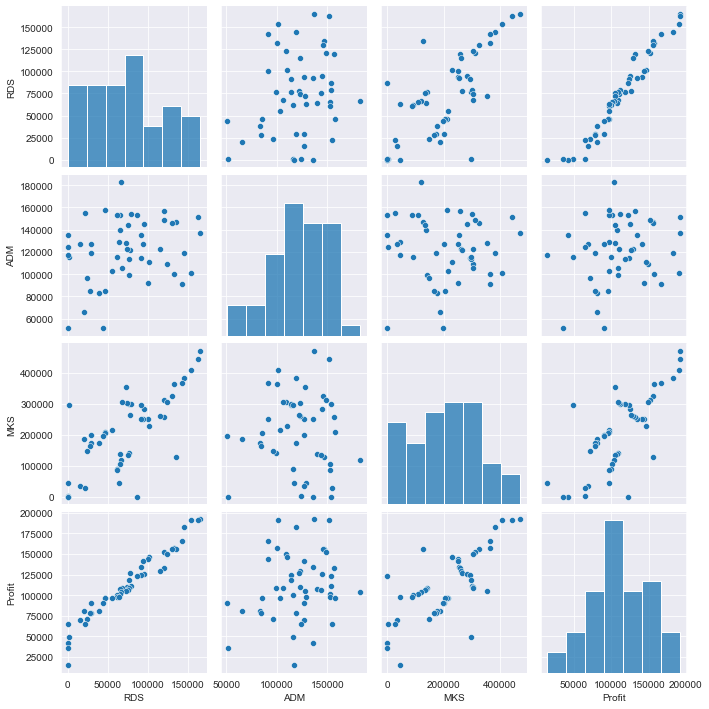

In [49]:
#Format the plot background and scatter plots for all the variables

sns.set_style(style='darkgrid')
sns.pairplot(data)

# Prepairing a Model

In [53]:
#Build model
model = smf.ols("Profit~MKS+RDS+ADM",data=data).fit()

In [54]:
#Coefficients
model.params

Intercept    50122.192990
MKS              0.027228
RDS              0.805715
ADM             -0.026816
dtype: float64

In [55]:
#t and p-Values
(model.tvalues, model.pvalues)

(Intercept     7.626218
 MKS           1.655077
 RDS          17.846374
 ADM          -0.525507
 dtype: float64,
 Intercept    1.057379e-09
 MKS          1.047168e-01
 RDS          2.634968e-22
 ADM          6.017551e-01
 dtype: float64)

In [57]:
#R squared values
(model.rsquared, model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

# Simple Linear Regression Models

In [59]:
slr_PM=smf.ols('Profit~MKS',data = data).fit()
slr_PM.pvalues , slr_PM.tvalues

(Intercept    4.294735e-10
 MKS          4.381073e-10
 dtype: float64,
 Intercept    7.808356
 MKS          7.802657
 dtype: float64)

In [60]:
slr_PR=smf.ols('Profit~RDS',data = data).fit()
slr_PR.pvalues , slr_PR.tvalues

(Intercept    2.782697e-24
 RDS          3.500322e-32
 dtype: float64,
 Intercept    19.320288
 RDS          29.151139
 dtype: float64)

In [61]:
slr_PA=smf.ols('Profit~ADM',data = data).fit()
slr_PA.pvalues , slr_PA.tvalues

(Intercept    0.003824
 ADM          0.162217
 dtype: float64,
 Intercept    3.040044
 ADM          1.419493
 dtype: float64)

In [62]:
slr_PMRA=smf.ols('Profit~MKS+RDS+ADM',data = data).fit()
slr_PMRA.pvalues , slr_PMRA.tvalues

(Intercept    1.057379e-09
 MKS          1.047168e-01
 RDS          2.634968e-22
 ADM          6.017551e-01
 dtype: float64,
 Intercept     7.626218
 MKS           1.655077
 RDS          17.846374
 ADM          -0.525507
 dtype: float64)

# Calculating VIF

In [63]:
a=smf.ols('MKS~ADM+RDS',data=data).fit().rsquared
vif_a=1/(1-a)

b=smf.ols('ADM~MKS+RDS',data=data).fit().rsquared
vif_b=1/(1-b)

c=smf.ols('RDS~ADM+MKS',data=data).fit().rsquared
vif_c=1/(1-c)

d1 = {'Variables':['MKS','ADM','RDS'],'VIF':[vif_a,vif_b,vif_c]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,MKS,2.326773
1,ADM,1.175091
2,RDS,2.468903


# Residual analysis

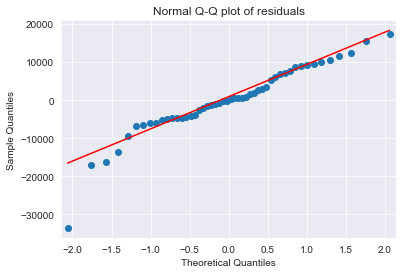

In [64]:
#Test for normality residuals(Q-Q plot)
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [65]:
residuals = model.resid
residuals

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

In [67]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [68]:
list(np.where(model.resid<-10))

[array([ 0,  4,  5,  6,  7,  9, 14, 15, 17, 18, 21, 22, 23, 24, 26, 27, 29,
        31, 32, 33, 39, 46, 47, 48, 49], dtype=int64)]

# Residual Plot for Homoscedasticity

In [69]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

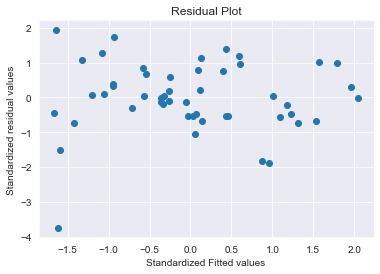

In [70]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [71]:
data.columns

Index(['RDS', 'ADM', 'MKS', 'State', 'Profit'], dtype='object')

Residual Vs Regressors

eval_env: 1


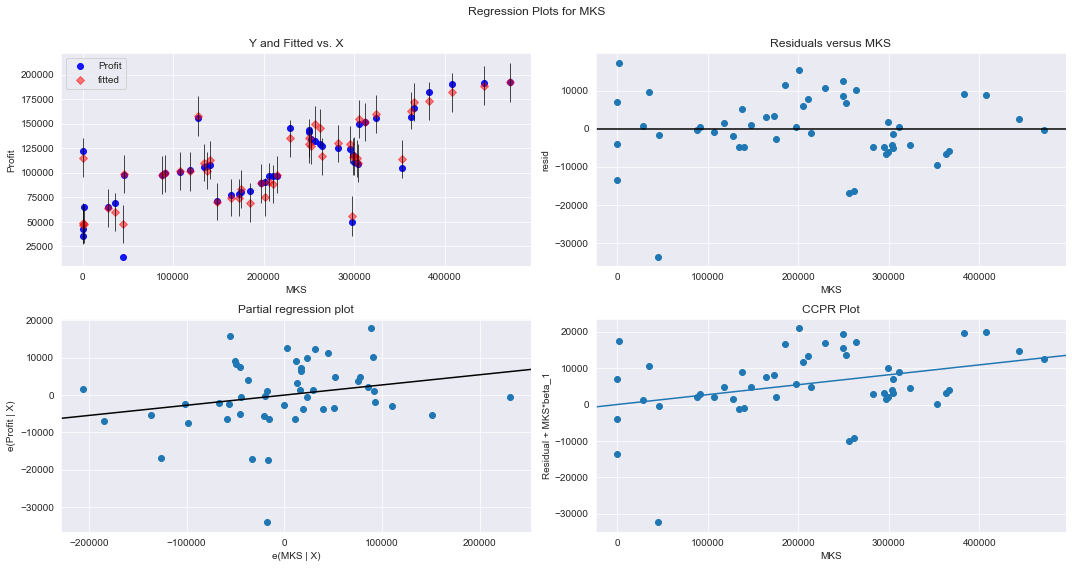

In [73]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MKS", fig=fig)
plt.show()

eval_env: 1


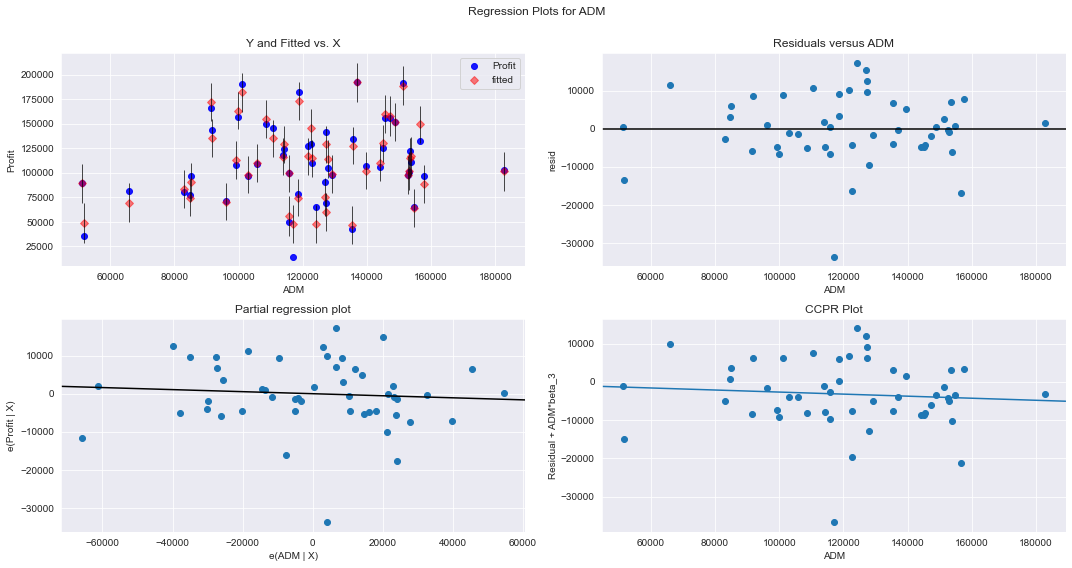

In [74]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADM", fig=fig)
plt.show()

eval_env: 1


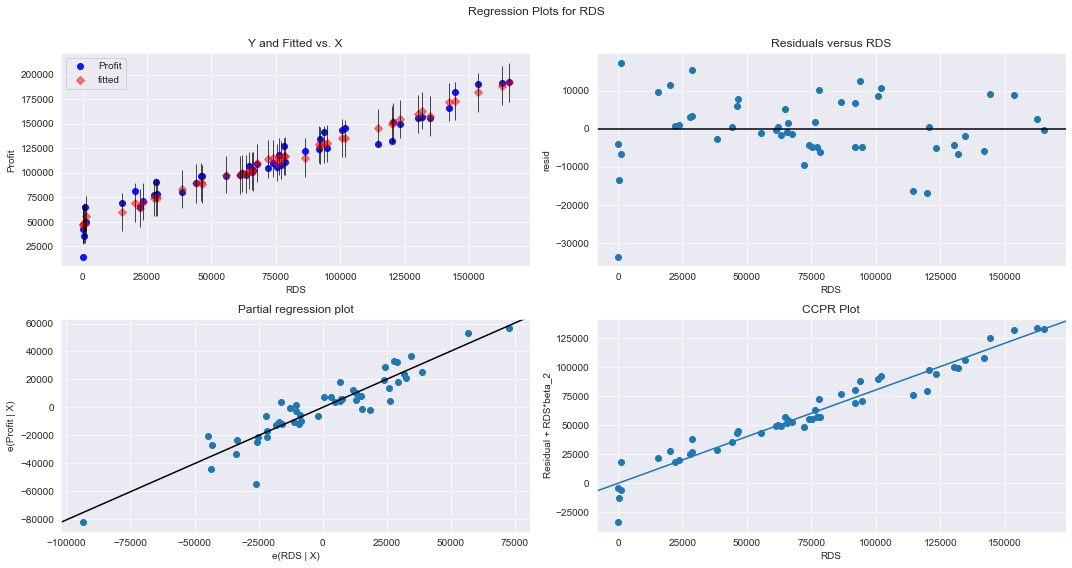

In [75]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [87]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [88]:
data

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


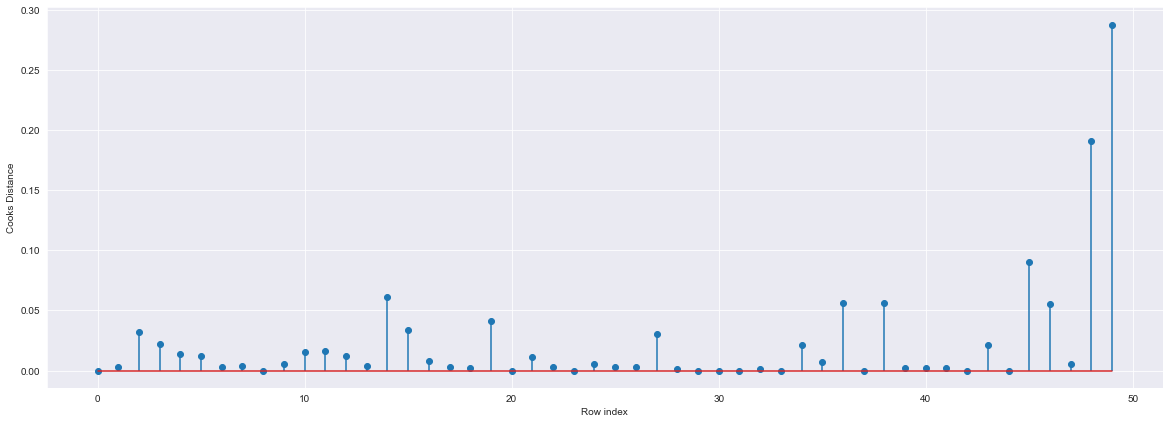

In [89]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [105]:
#index and value of influencer where c is more than .05
(np.argmax(c),np.max(c))

(49, 0.2880822927543274)

# High Influence points

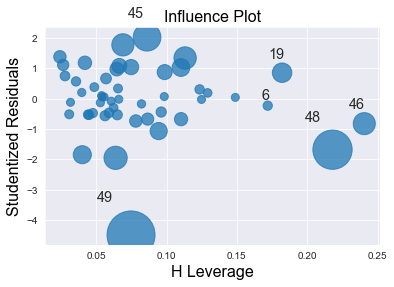

In [91]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [94]:
k = data.shape[1]
n = data.shape[0]

leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [96]:
#From the above plot, it is evident that data point 70 and 76 are the influencers
data[data.index.isin([49])]

,RDS,ADM,MKS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the model

In [111]:
#Discard the data points which are influencers and reasign the row number (reset_index())

dfnew=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
dfnew

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build Home

In [112]:
#Exclude variable "MKS" and generate R-Squared and AIC values
final_ml_V= smf.ols('Profit~RDS+ADM',data = dfnew).fit()

In [113]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9584519070123048, 1022.0654576388338)

In [114]:
#Exclude variable "ADM" and generate R-Squared and AIC values
final_ml_W= smf.ols('Profit~RDS+MKS',data = dfnew).fit()

In [115]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.9610856807456628, 1018.8564801588338)

# Crook's Distance

In [116]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

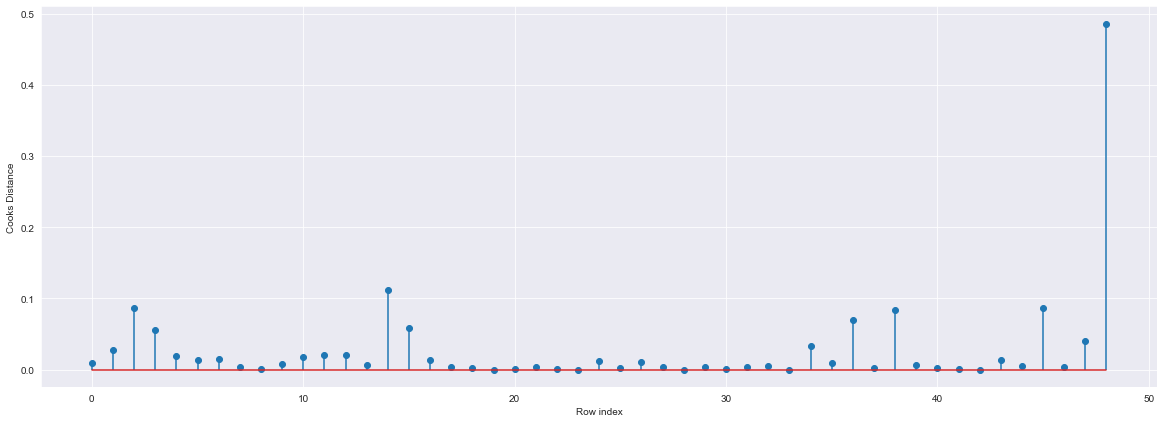

In [117]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dfnew)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [122]:
#index of the data points where c is more than .05
(np.argmax(c_V),np.max(c_V))                

(48, 0.4858492750821664)

In [123]:
dfnew

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Improving the Model

In [133]:
#Drop the observations
df3=dfnew.drop(dfnew.index[[48]],axis=0)

In [134]:
df3

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Detection Diagnostics and Final Model

In [135]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RDS+ADM+MKS",data=df3).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df3=df3.drop(df3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df3
else:
    final_model=smf.ols("Profit~RDS+ADM+MKS",data=df3).fit()
    final_model.rsquared , final_model.aic
    

In [137]:
final_model.rsquared

0.9626766170294073

In [138]:
df4

,RDS,ADM,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Model Prediction

In [141]:
data11=pd.DataFrame({'RDS':120000,"ADM":100000,"MKS":250000},index=[0])
data11

,RDS,ADM,MKS
0,120000,100000,250000


In [143]:
final_model.predict(data11)

0    151726.732587
dtype: float64

In [144]:
pred_y=final_model.predict(df3)
pred_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64

In [145]:
d1={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d1)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.962677
